## **HOUSE PRICE PREDICTION**


The goal of this project is to develop a machine learning model with Linear Regression, to accurately predict real estate prices. We use historical data with features like square footage, bathrooms, location, etc., to understand and predict property valuation.

## DATA EXTRACTION

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/pan-india-property-listings-2025-real-estate-data")

print("Path to dataset files:", path)

100%|██████████| 2.00M/2.00M [00:00<00:00, 109MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pratyushpuri/pan-india-property-listings-2025-real-estate-data/versions/1


In [ ]:
import os

# List all files in the dataset folder
os.listdir("/root/.cache/kagglehub/datasets/pratyushpuri/pan-india-property-listings-2025-real-estate-data/versions/1")

['train_part2.csv',
 'test_part1.csv',
 'train_part2.json',
 'train_part1.csv',
 'test_part1.json',
 'train_part1.xlsx',
 'train_part1.json',
 'metadata.json',
 'test_part2.json',
 'test_part1.xlsx',
 'test_part2.xlsx',
 'test_part2.csv',
 'train_part2.xlsx']

### Importing necessary Libraries
(importing as and when we need it)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

df1 = pd.read_csv("/root/.cache/kagglehub/datasets/pratyushpuri/pan-india-property-listings-2025-real-estate-data/versions/1/train_part1.csv")
df1.head()

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
0,HP01139,Bengaluru,NaN,Villa,3,3.0,2.0,Semi-Furnished,1576,1299,...,Bungalow,2018.0,7,South-East,3,True,BEN-RERA-9928-63,12.877154,77.656243,17770000
1,HP01630,Kolkata,Rajarhat,Apartment,1,2.0,1.0,Unfurnished,1098,870,...,Mid Rise,2010.0,15,North-West,9,True,KOL-RERA-6820-36,22.584035,88.440364,7130000
2,HP01608,Kolkata,Salt Lake,Apartment,1,2.0,3.0,Unfurnished,863,710,...,High Rise,2006.0,19,South,6,True,KOL-RERA-5304-84,22.535687,88.416707,5920000
3,HP01979,MMR,Goregaon East,Apartment,2,3.0,NaN,Furnished,1135,952,...,High Rise,2025.0,0,North-East,7,False,NaN,NaN,72.877790,19140000
4,HP01399,Hyderabad,Madhapur,Apartment,3,4.0,1.0,Semi-Furnished,2662,2176,...,Standalone Building,2010.0,15,North,6,True,HYD-RERA-7537-95,17.444963,78.431430,20300000


In [ ]:
df2 = pd.read_csv("/root/.cache/kagglehub/datasets/pratyushpuri/pan-india-property-listings-2025-real-estate-data/versions/1/train_part2.csv")
df2.head()

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
0,HP01287,Bengaluru,Banashankari,Apartment,3,3.0,2.0,Semi-Furnished,1816,1386,...,Standalone Building,2018.0,7,South,9,True,BEN-RERA-3063-23,12.822958,77.759009,15060000
1,HP01726,Delhi NCR,Faridabad-Sector 21,Apartment,2,2.0,2.0,Semi-Furnished,1579,1205,...,Standalone Building,2009.0,16,South-West,8,True,DEL-RERA-8739-21,28.563276,76.992152,12570000
2,HP01011,Pune,Hinjawadi,Independent House,3,3.0,1.0,Unfurnished,2073,1711,...,Standalone Building,2014.0,11,North-East,4,True,PUN-RERA-4033-88,18.468168,NaN,17470000
3,HP00910,Chennai,Velachery,Villa,4,5.0,1.0,Unfurnished,3637,3031,...,Bungalow,2006.0,19,North-West,5,True,CHE-RERA-9763-53,12.922412,80.312701,36280000
4,HP01536,Chennai,T Nagar,Penthouse,6,7.0,2.0,Unfurnished,3973,2982,...,High Rise,2008.0,17,North,7,True,CHE-RERA-8666-20,13.061543,80.329035,36640000


The target variable is available in the files train1 and train2 which have been extracted to df1 and df2. Merging these two dataframes for analysis.

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.tail(5)

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR
4723,HP00733,Chennai,Porur,Penthouse,4,5.0,3.0,Unfurnished,2670,2228,...,High Rise,2008.0,17,South-East,9,True,CHE-RERA-1823-72,13.077017,80.344260,26250000
4724,HP00905,Hyderabad,Kukatpally,Villa,5,5.0,3.0,Furnished,5077,4181,...,Standalone Building,2004.0,21,West,9,True,HYD-RERA-4007-79,17.460544,78.436887,48420000
4725,HP00542,Delhi NCR,Noida-Sector 62,Apartment,3,3.0,1.0,Unfurnished,2092,1590,...,Gated Community,1997.0,28,North,10,False,NaN,28.776437,77.033101,16880000
4726,HP01215,MMR,Vile Parle,Apartment,2,3.0,2.0,Semi-Furnished,1083,905,...,Mid Rise,2010.0,15,North-West,7,True,MMR-RERA-7553-86,19.060848,72.800001,17560000
4727,HP00443,Chennai,OMR,Apartment,1,2.0,3.0,Unfurnished,900,709,...,Gated Community,1999.0,26,South-East,9,True,CHE-RERA-2546-26,13.187485,80.307801,7810000


## DATA AUDITING/AVAILABILITY

In [ ]:
# Shape of the dataset (Rows,Columns)
df.shape

(4728, 24)

In [ ]:
# Information about name of columns, datatypes, non-null enteries and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingID              4728 non-null   object 
 1   City                   4678 non-null   object 
 2   Locality               4658 non-null   object 
 3   PropertyType           4728 non-null   object 
 4   BHK                    4728 non-null   int64  
 5   Bathrooms              4674 non-null   float64
 6   Balconies              4628 non-null   float64
 7   Furnishing             4645 non-null   object 
 8   SuperBuiltUpArea_sqft  4728 non-null   int64  
 9   BuiltUpArea_sqft       4728 non-null   int64  
 10  CarpetArea_sqft        4728 non-null   int64  
 11  Floor                  4728 non-null   int64  
 12  TotalFloors            4728 non-null   int64  
 13  Parking                4288 non-null   object 
 14  BuildingType           4728 non-null   object 
 15  Year

In [ ]:
# Null/missing values count in a variable
df.isnull().sum()

,0
ListingID,0
City,50
Locality,70
PropertyType,0
BHK,0
Bathrooms,54
Balconies,100
Furnishing,83
SuperBuiltUpArea_sqft,0
BuiltUpArea_sqft,0


In [ ]:
# Missing value percent for each attribute
(df.isnull().sum()*100)/df.shape[0]

,0
ListingID,0.000000
City,1.057530
Locality,1.480541
PropertyType,0.000000
BHK,0.000000
Bathrooms,1.142132
Balconies,2.115059
Furnishing,1.755499
SuperBuiltUpArea_sqft,0.000000
BuiltUpArea_sqft,0.000000


In [ ]:
# Finding duplicate records
df[df.duplicated()]

,ListingID,City,Locality,PropertyType,BHK,Bathrooms,Balconies,Furnishing,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,...,BuildingType,YearBuilt,AgeYears,Facing,AmenitiesCount,IsRERARegistered,RERAID,Latitude,Longitude,Price_INR


In [ ]:
# Unique counts in each variable
unique_count = {}
for col in df.columns:
    unique_count[col] = df[col].nunique()

unique_count_df = pd.DataFrame(list(unique_count.items()), columns=['Columns','Unique Count'])
unique_count_df

,Columns,Unique Count
0,ListingID,2364
1,City,8
2,Locality,59
3,PropertyType,6
4,BHK,7
5,Bathrooms,7
6,Balconies,4
7,Furnishing,3
8,SuperBuiltUpArea_sqft,2512
9,BuiltUpArea_sqft,2186


According the problem statement, the house price is influenced by its location, size, layout, usable space, age and the amenities it provides to a buyer
In that sense, we have attributes: no. of bedrooms(BHK), bathrooms, balconies, amenities, size of the house(area per square feet) and location (city, locality, longitude, latitude), as well as age of the house in construction year and age in years, also condition of furnishing, building type and floors.  
`Sufficient number of features are available to predict the target variable-Price`

## EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Statistical summary
df.describe()

,BHK,Bathrooms,Balconies,SuperBuiltUpArea_sqft,BuiltUpArea_sqft,CarpetArea_sqft,Floor,TotalFloors,YearBuilt,AgeYears,AmenitiesCount,Latitude,Longitude,Price_INR
count,4728.000000,4674.000000,4628.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4689.000000,4728.000000,4728.000000,4678.000000,4669.000000,4.728000e+03
mean,2.551819,3.228070,1.524417,1976.857234,1563.064086,1333.160321,6.516286,12.504653,2014.146726,10.856176,7.022208,19.374590,77.571982,1.853415e+07
std,1.278891,1.243935,0.706609,1042.352626,809.452530,673.568980,7.375319,10.698632,7.427250,7.424854,1.590023,4.967147,4.736063,1.276603e+07
min,0.000000,1.000000,0.000000,406.000000,336.000000,300.000000,0.000000,1.000000,1985.000000,0.000000,3.000000,12.800641,72.400121,2.000000e+06
25%,2.000000,2.000000,1.000000,1237.000000,989.000000,854.000000,1.000000,4.000000,2009.000000,5.000000,6.000000,13.186363,73.753105,1.007000e+07
50%,3.000000,3.000000,1.000000,1765.000000,1404.500000,1208.000000,4.000000,9.000000,2015.000000,10.000000,7.000000,18.643519,77.462390,1.531000e+07
75%,3.000000,4.000000,2.000000,2512.000000,1992.250000,1702.000000,9.000000,18.000000,2020.000000,16.000000,8.000000,22.906225,78.594666,2.333000e+07
max,6.000000,7.000000,3.000000,6896.000000,5297.000000,4185.000000,39.000000,40.000000,2025.000000,40.000000,12.000000,28.799692,88.499776,1.342000e+08


The statistical summary tells us the mean, standard deviation, minimum-maximum values, and number of data points in quartiles for both variables with discrete values and continuous values.

### Univariate Analysis

- Countplot
- kde
- boxplot
- Barplot

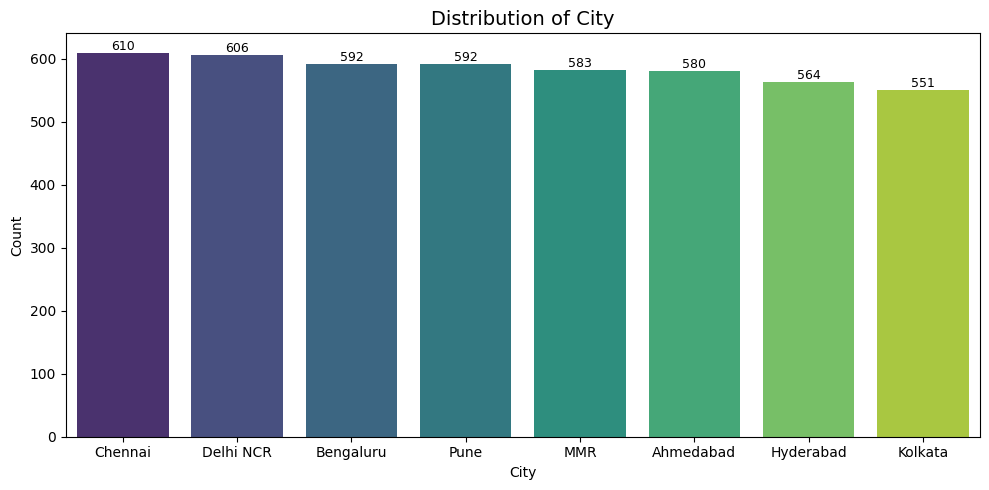

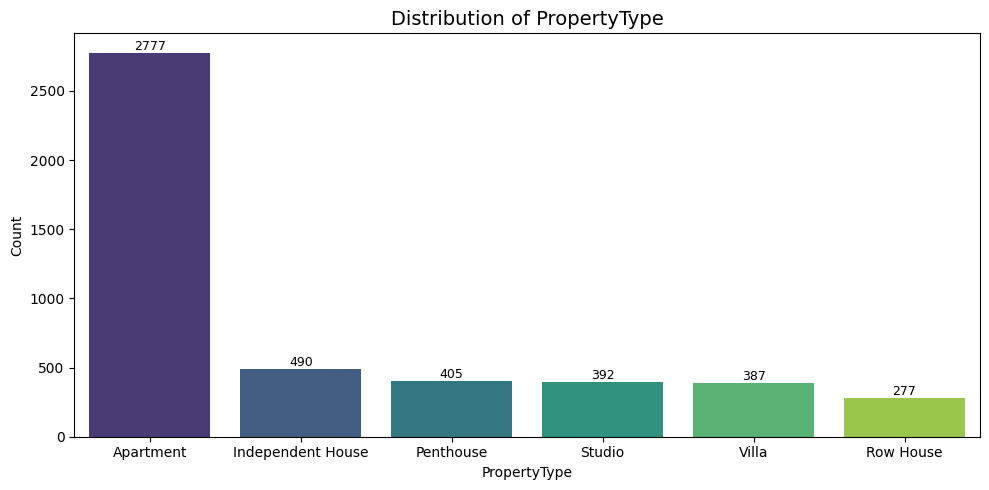

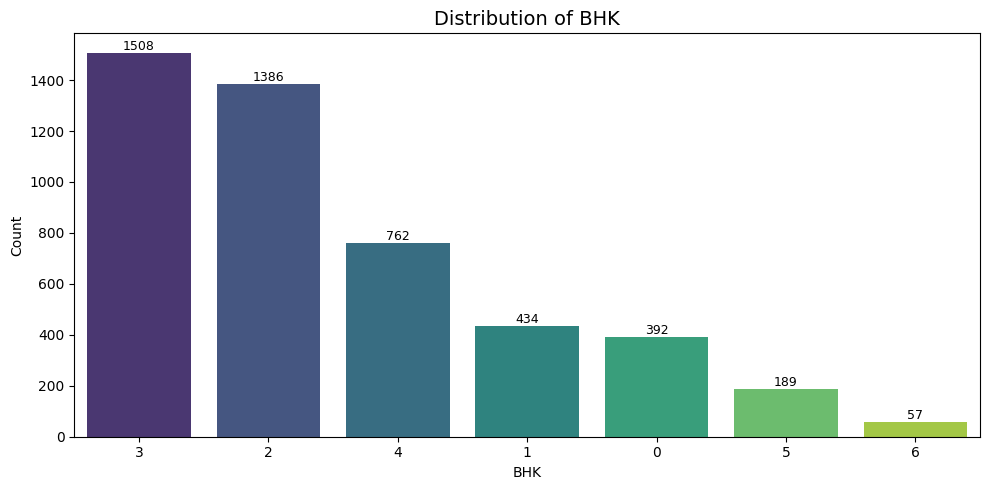

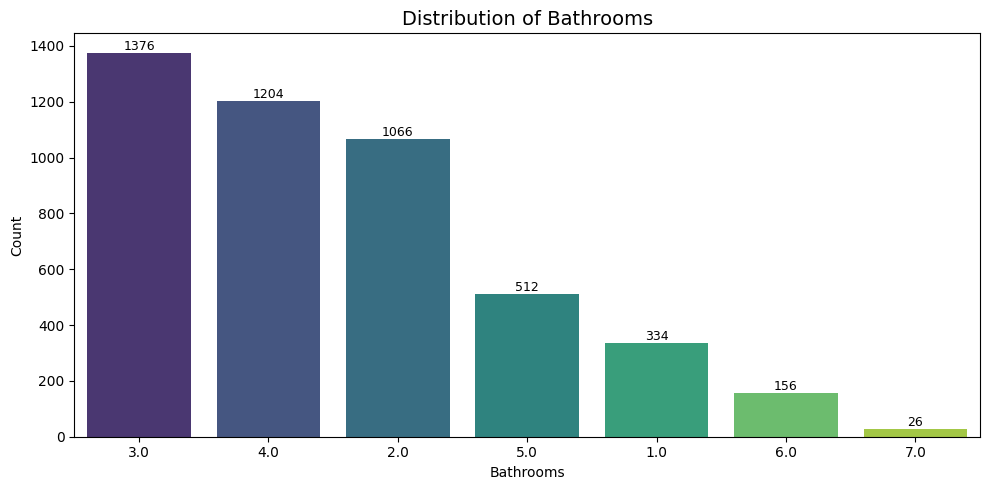

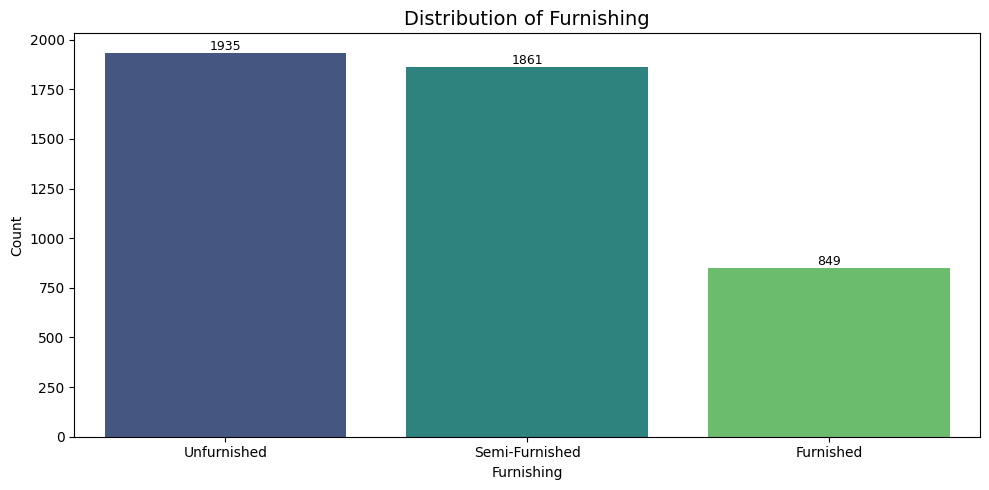

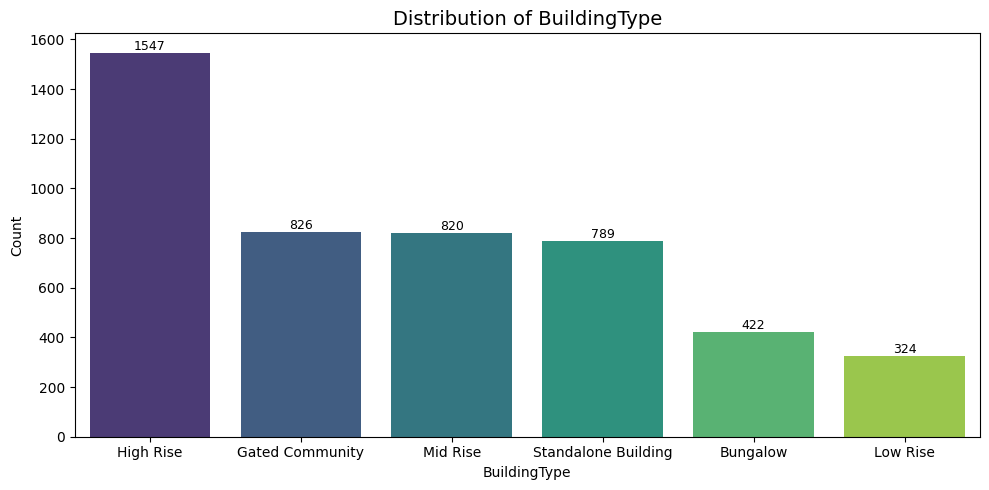

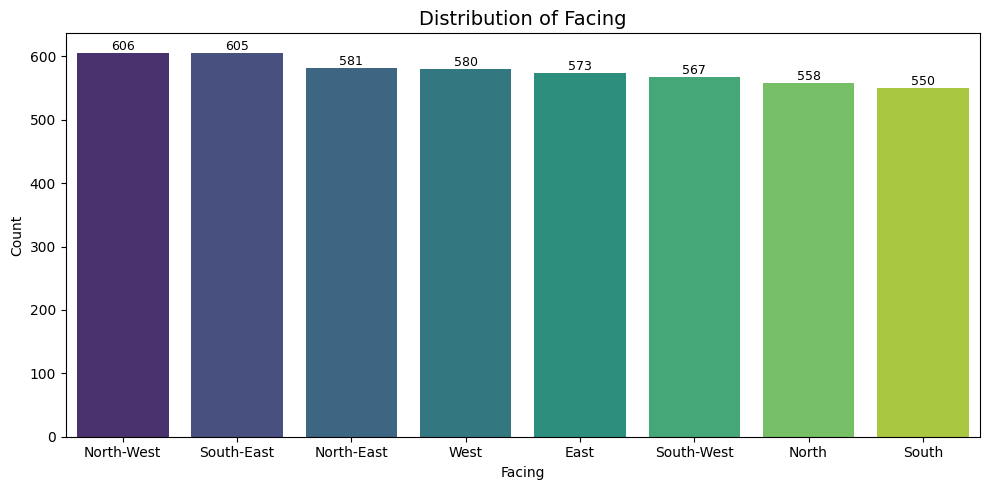

In [ ]:
columns = ['City', 'PropertyType', 'BHK', 'Bathrooms',
           'Furnishing', 'BuildingType', 'Facing']

for col in columns:
    plt.figure(figsize=(10, 5))

    # Create bar plot
    order = df[col].value_counts().index

    ax = sns.countplot(data=df, x=col, order=order, palette='viridis')

    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

- The **cities** with a high number of houses listed were Chennai, Delhi, Bengaluru
and Ahmedabad  
- In the property type-number of **apartments** listed are 2777, almost half of the dataset  
- **3 BHK** followed by **2 BHK** constitutes majority of the dataset  
- Most of the houses have 3 or 4 or 2 **bathrooms**
- almost **80% of the data** has either unfurnished or semi-furnished houses listed  
- **Building type** ranking -> High rise, gated community, Mid rise, Standalone, bungalow and low rise  
- Houses listed are almost **equally distributed in either directions**

<Figure size 600x400 with 0 Axes>

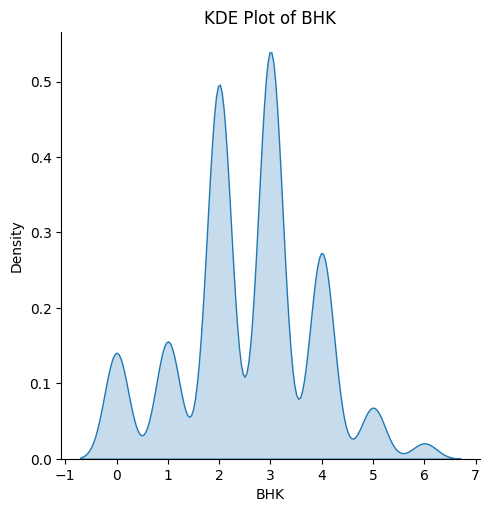

<Figure size 600x400 with 0 Axes>

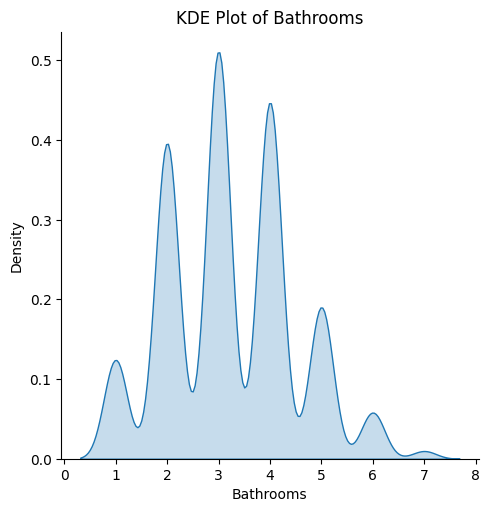

<Figure size 600x400 with 0 Axes>

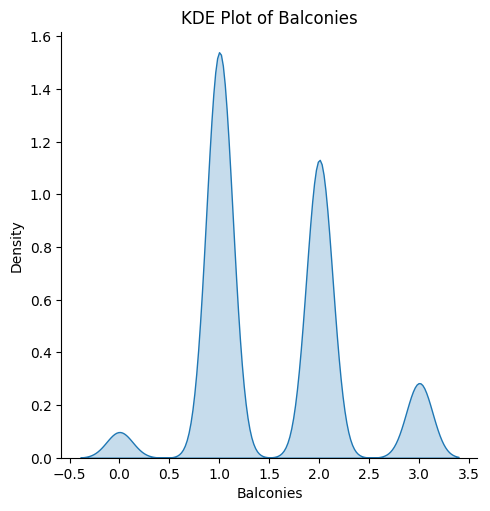

<Figure size 600x400 with 0 Axes>

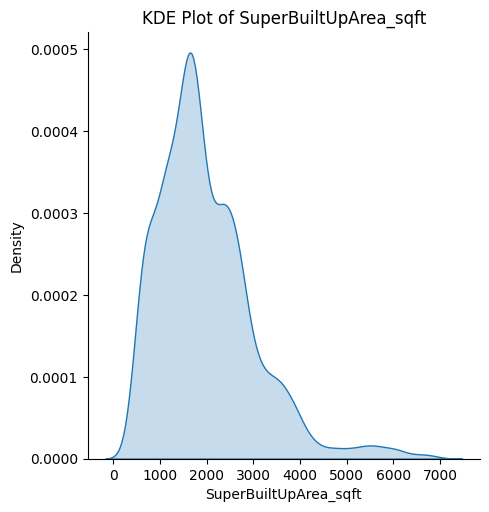

<Figure size 600x400 with 0 Axes>

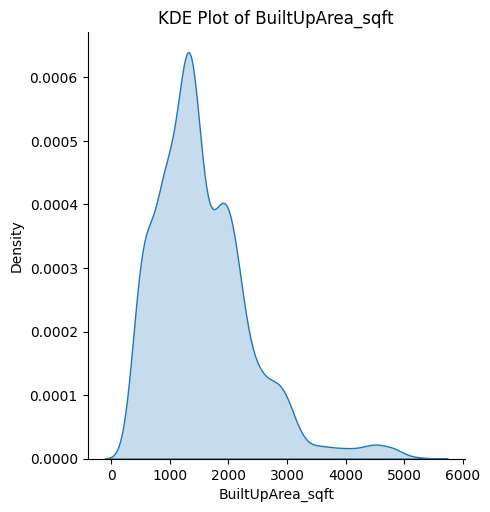

<Figure size 600x400 with 0 Axes>

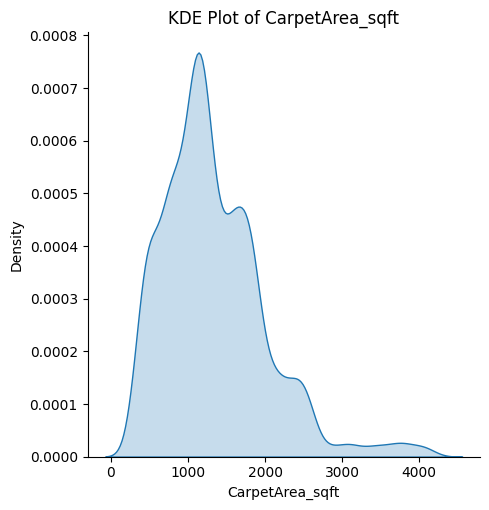

<Figure size 600x400 with 0 Axes>

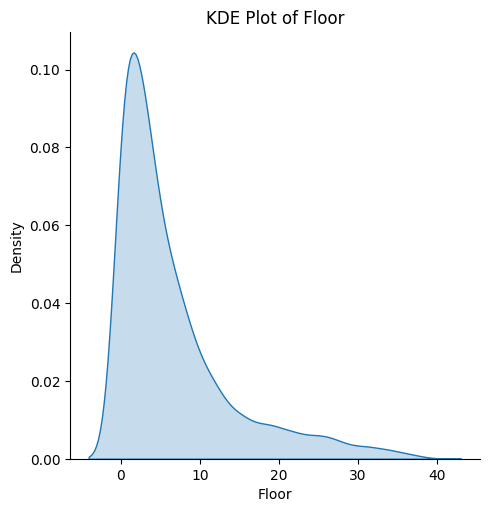

<Figure size 600x400 with 0 Axes>

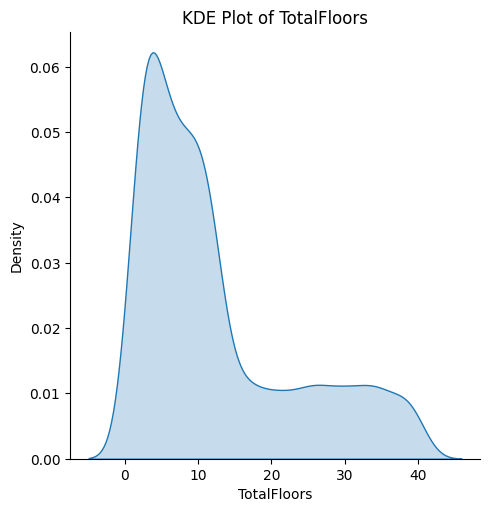

<Figure size 600x400 with 0 Axes>

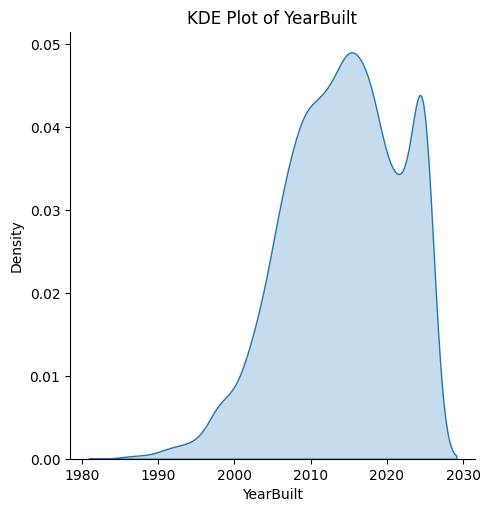

<Figure size 600x400 with 0 Axes>

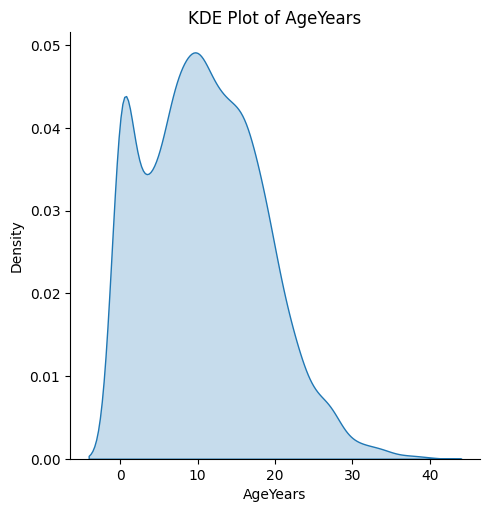

<Figure size 600x400 with 0 Axes>

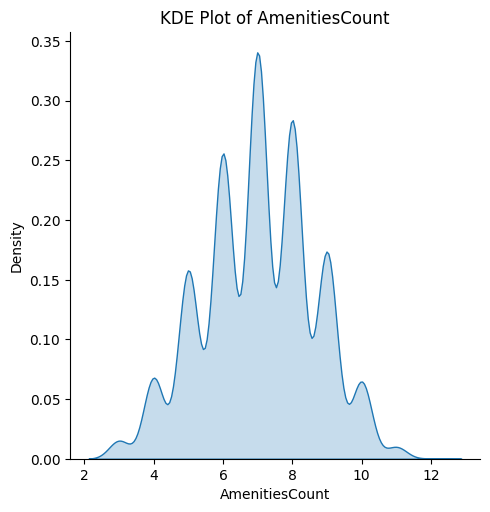

<Figure size 600x400 with 0 Axes>

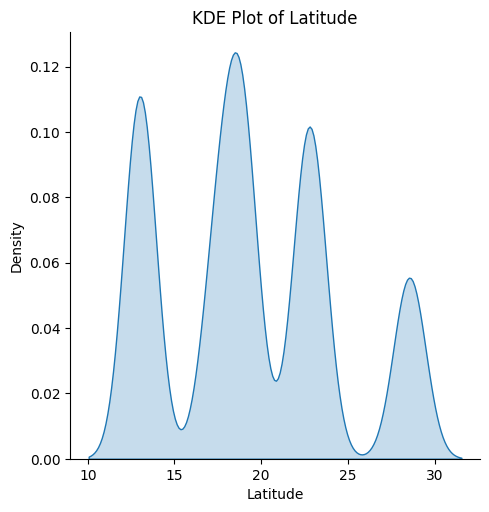

<Figure size 600x400 with 0 Axes>

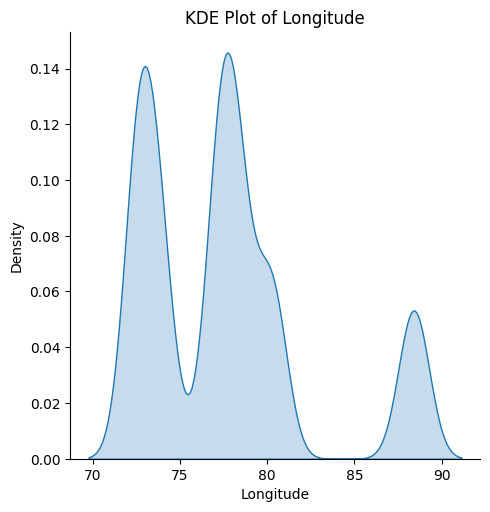

<Figure size 600x400 with 0 Axes>

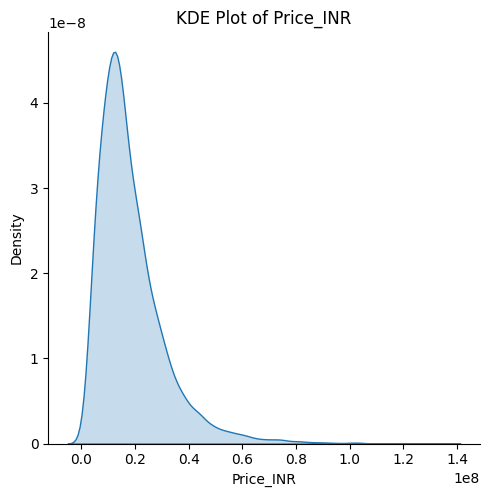

In [ ]:
# KDE plot
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.displot(data=df, x=df[col], kind='kde', fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.show()

- KDE plots for **Bathrooms, BHK, Balconies, AmentiesCount, Latitude, Longitutde** show multi-modal distributions with clear peaks at integer values (e.g., 2, 3, 4 for Bathrooms; 2, 3, 4 for BHK)
- Local Peaks in Longitude and Latitude shows properties are concentrated on few clusters
- KDE plot for **SuperBuiltUpArea_sqft, BuiltUpArea, CarpetArea, Floor, TotalFloors, AgeYears and Price** shows a distribution that is unimodal but highly right-skewed


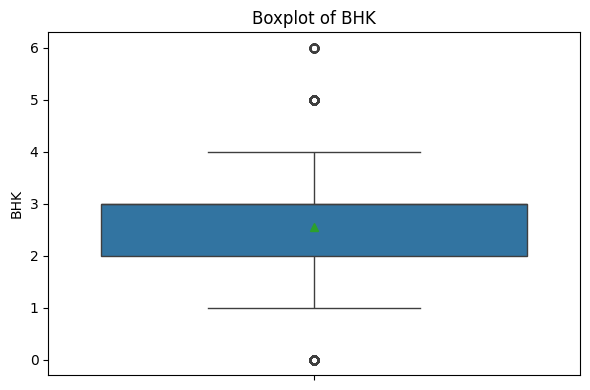

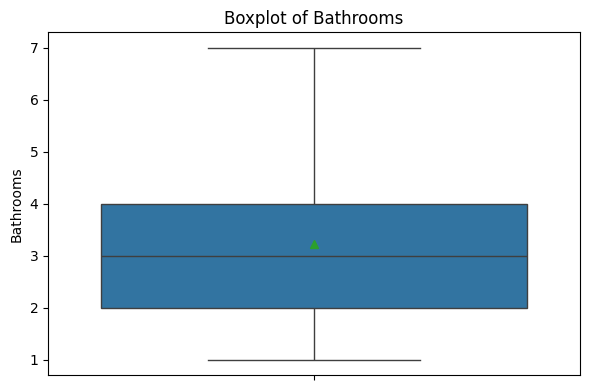

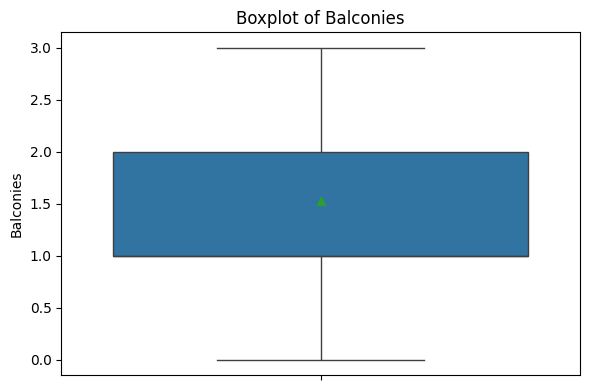

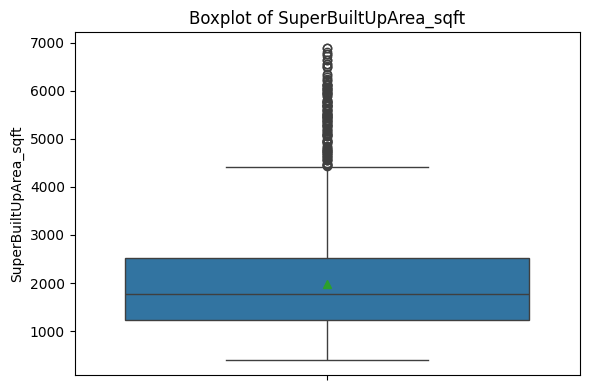

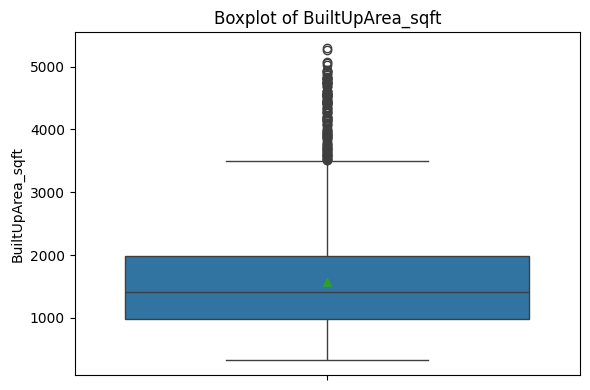

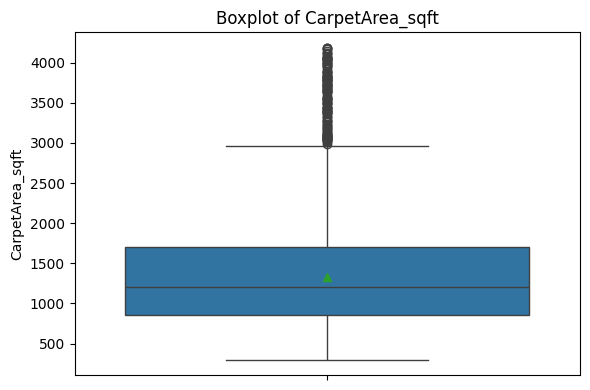

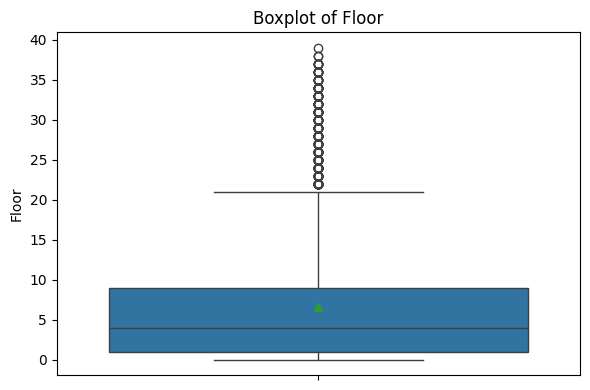

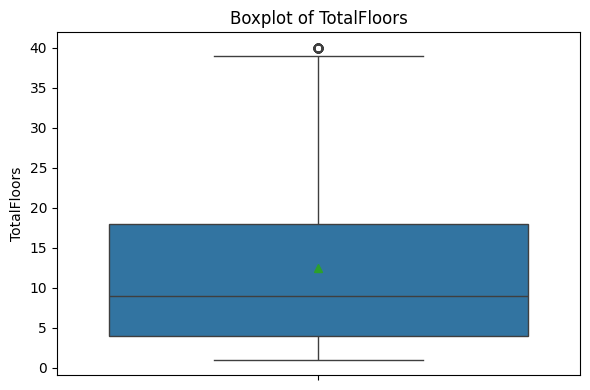

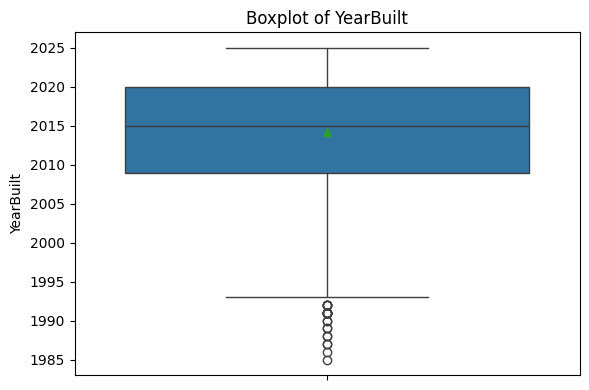

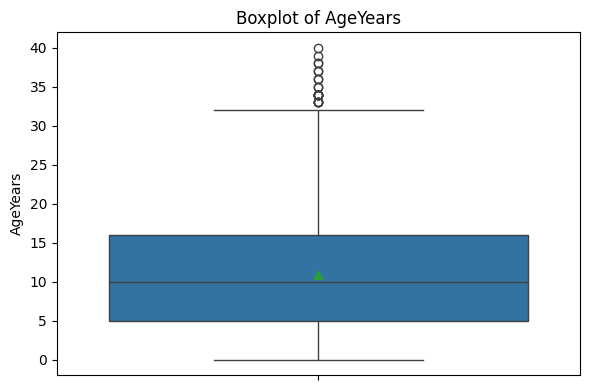

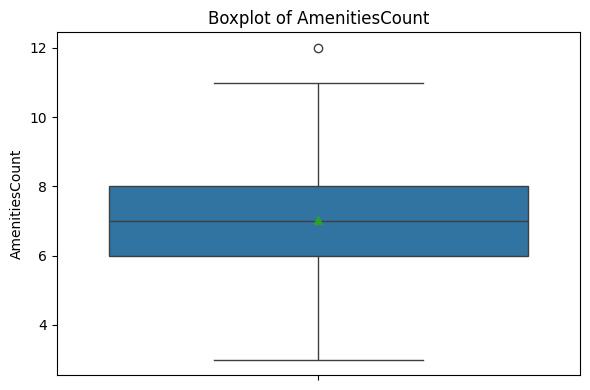

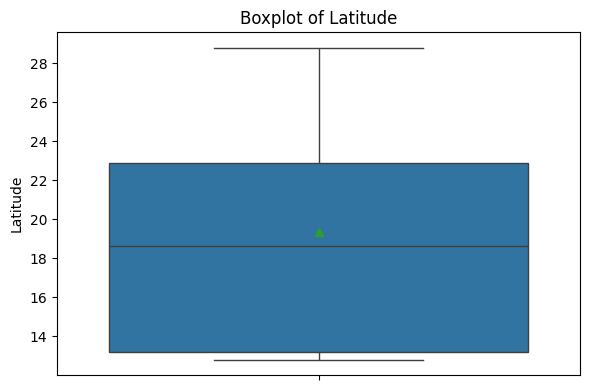

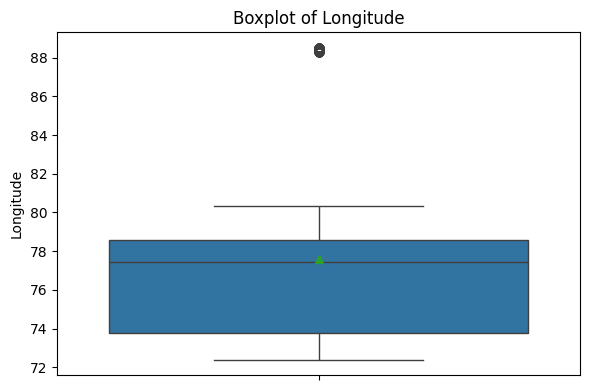

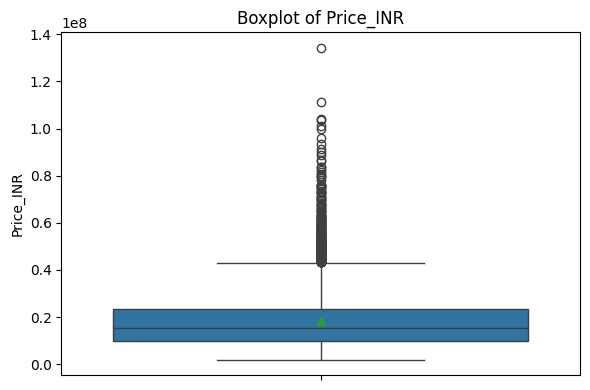

In [ ]:
# Boxplot

for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col], showmeans=True)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

- There are some outliers in variables:- BHK, AgeYears, YearBuilt, Amenities and Total Floor.  
- The box plots of balconies, BHK and Amneties are evenly distributed while others show skewness.
- We can observe many outliers in Area(Super, BuiltUp and Carpet) as well as in Price. But we cannot treat them as noise because higher price means premium quality of houses like large area.

### Bivariate Analysis
-Scatter Plots  
-Box Plots  
-Barplots

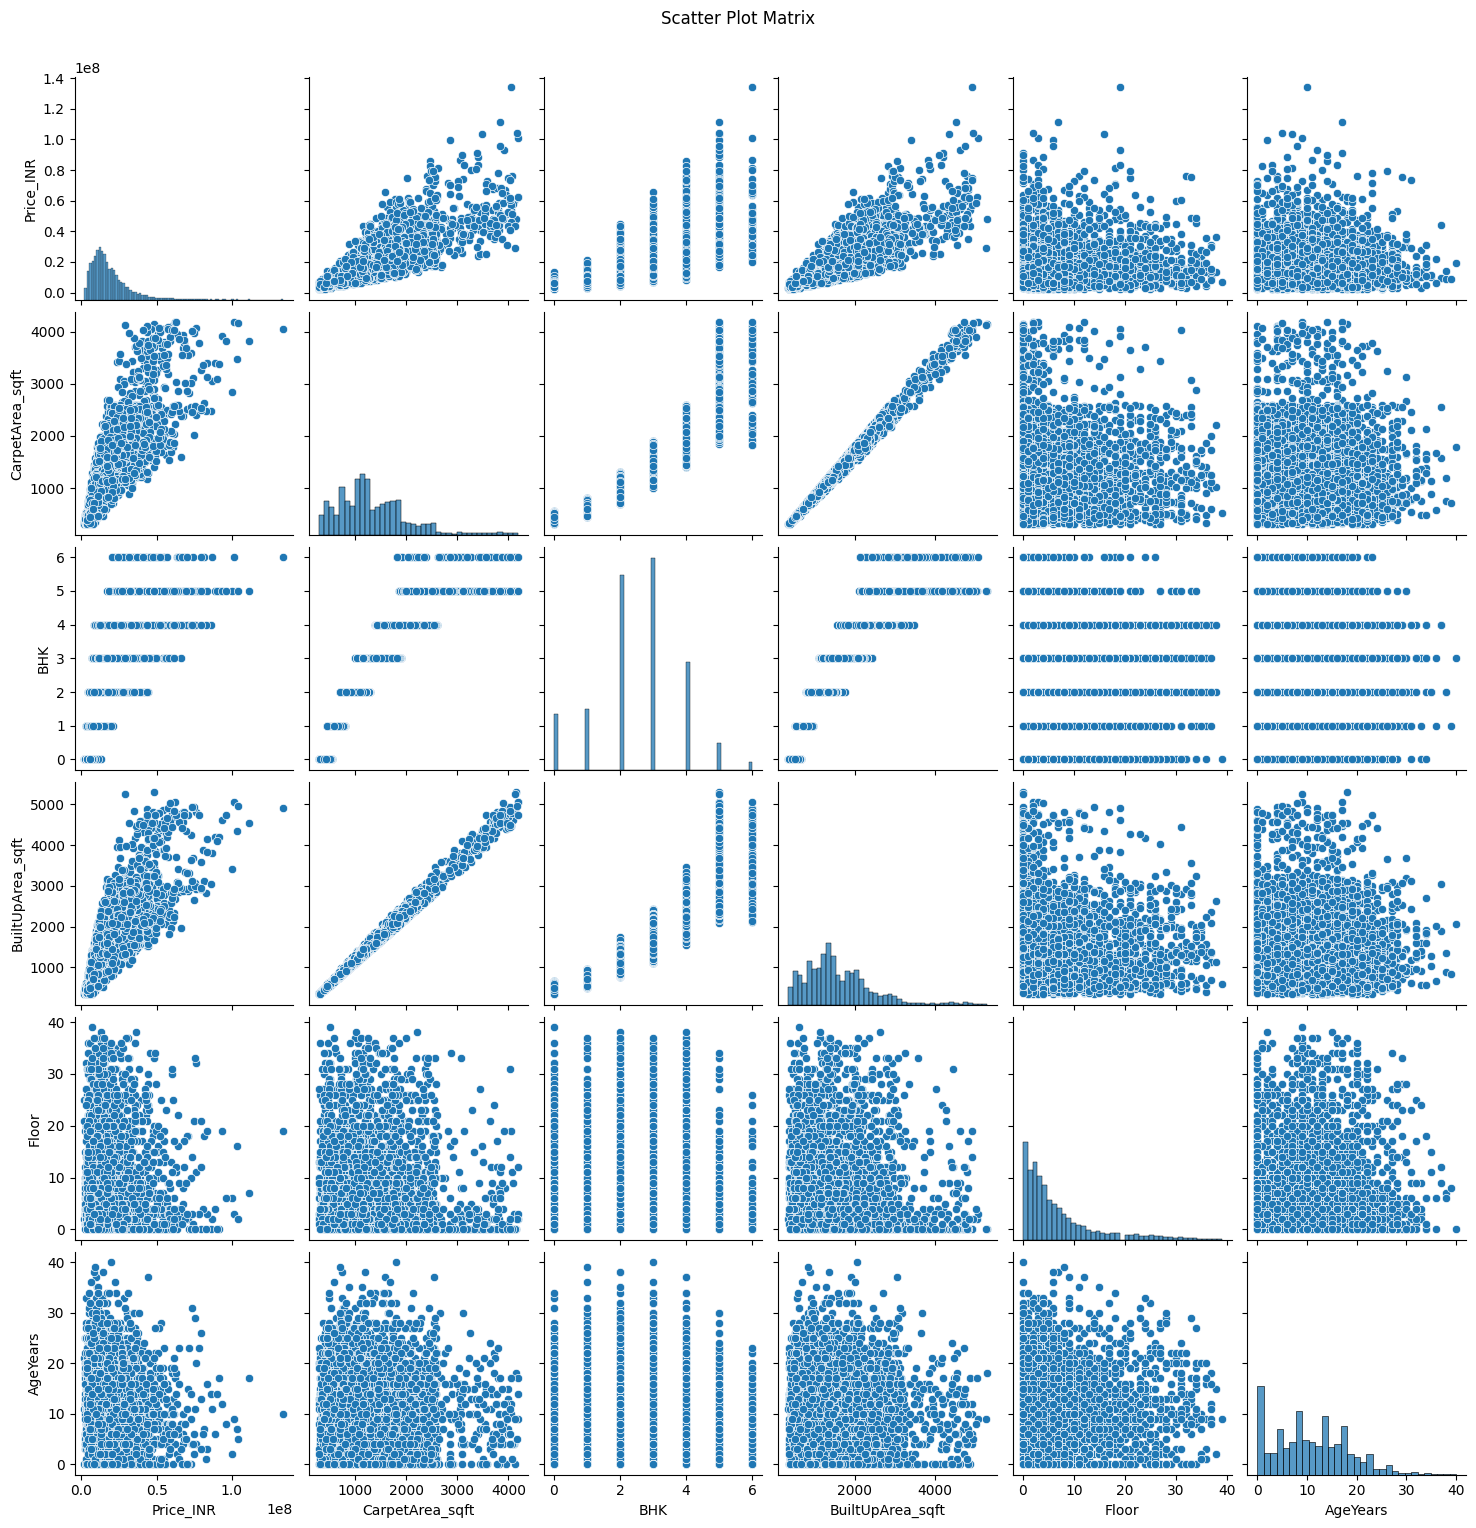

In [ ]:
sns.pairplot(df[['Price_INR', 'CarpetArea_sqft', 'BHK', 'BuiltUpArea_sqft','Floor', 'AgeYears']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

- There is a clear positive increasing relationship between carpet area and built up area.
- The relationship between price with carpet are & built up area is positive and increasing.
- The other variables don't show a clear indication of positive or negative relation but major data points are clustered near the lower-medium values.

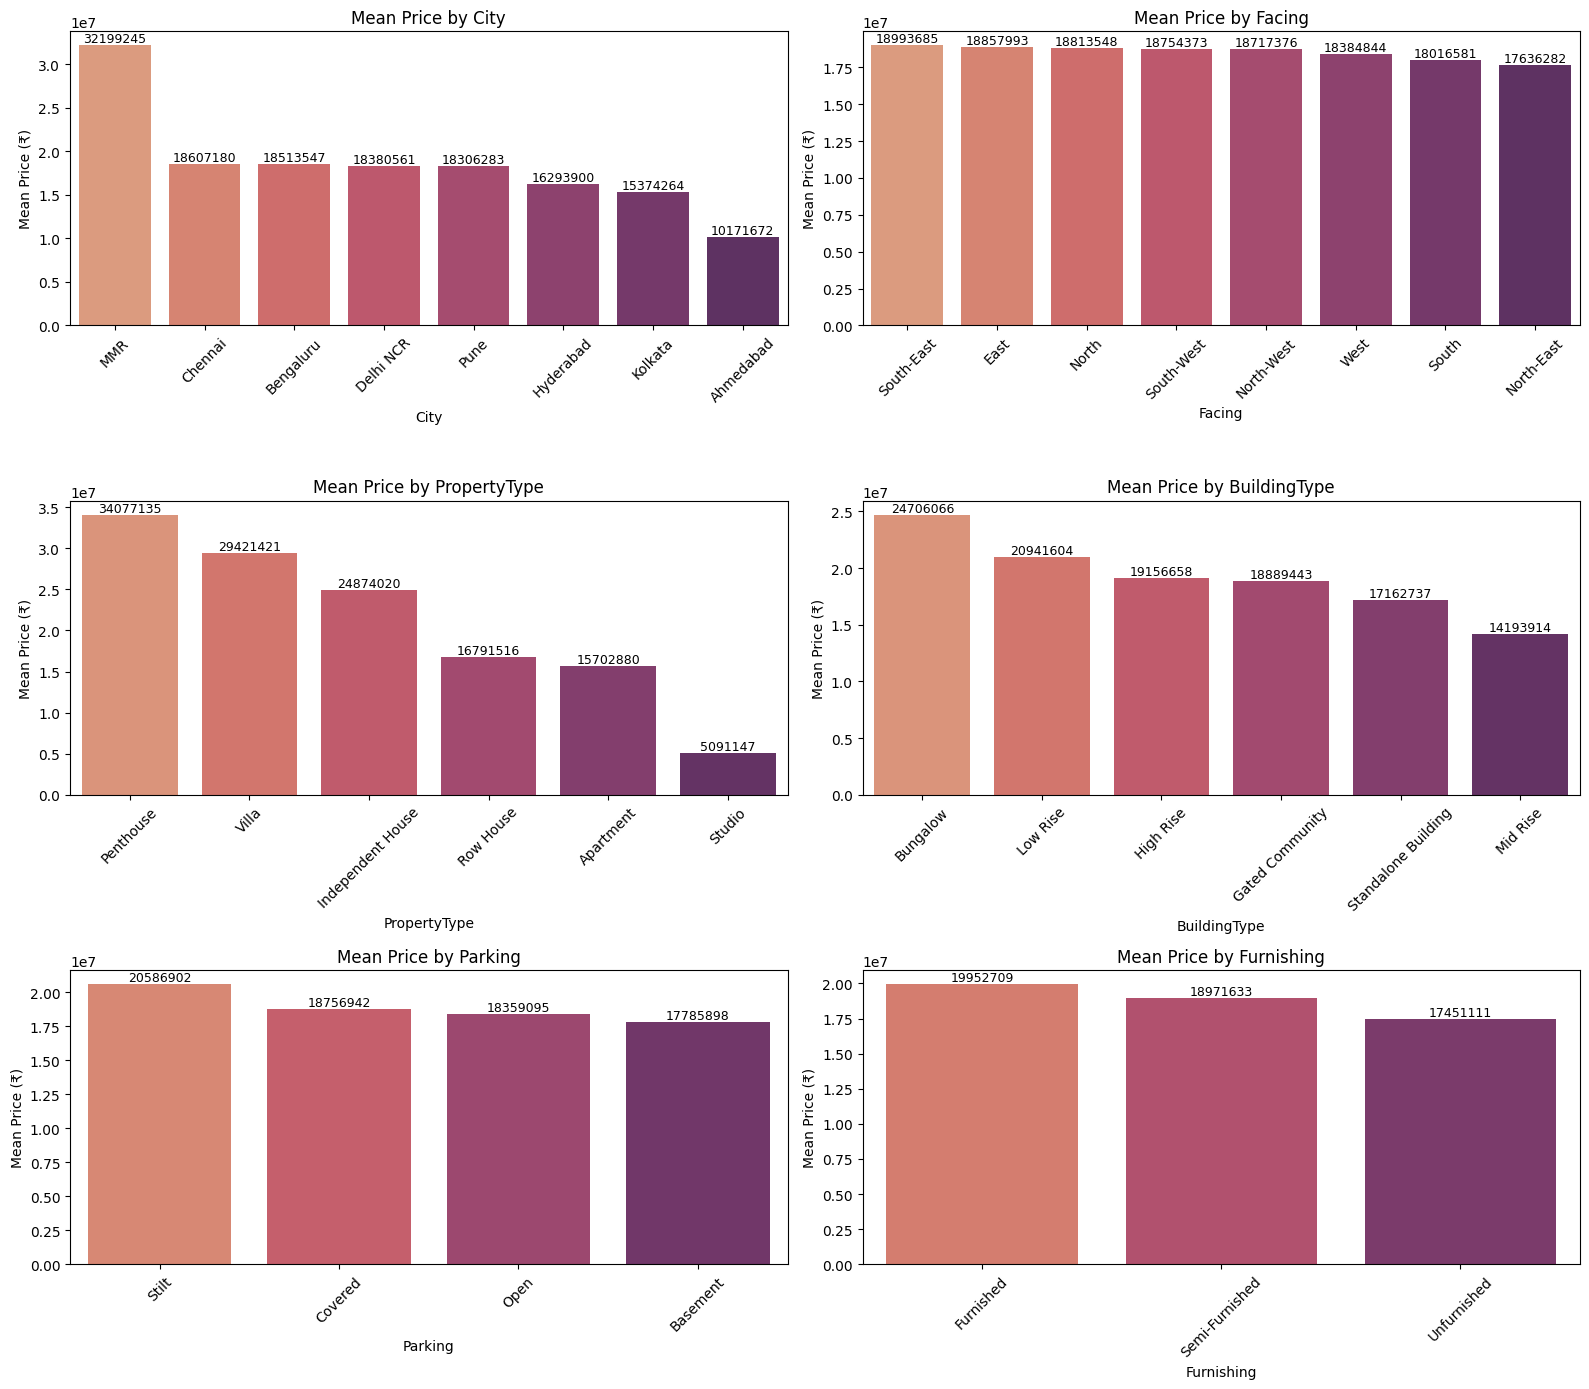

In [ ]:
# Barplot

subplot_cols = ['City', 'Facing', 'PropertyType', 'BuildingType', 'Parking', 'Furnishing']

plt.figure(figsize=(16, 14))

for i, col in enumerate(subplot_cols, 1):
    plt.subplot(3, 2, i)
    mean_price = df.groupby(col)['Price_INR'].mean().reset_index().sort_values('Price_INR', ascending=False)
    ax = sns.barplot(x=col, y='Price_INR', data=mean_price, palette='flare')
    # ax = df_temp.groupby(col)['Price_INR'].mean().sort_values(ascending=False).plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    plt.ylabel("Mean Price (₹)")
    plt.xticks(rotation=45)
    plt.title(f"Mean Price by {col}")

plt.tight_layout()
plt.show()


This plot shows the category with highest mean value in the categorical variables.

### Multivariate analysis

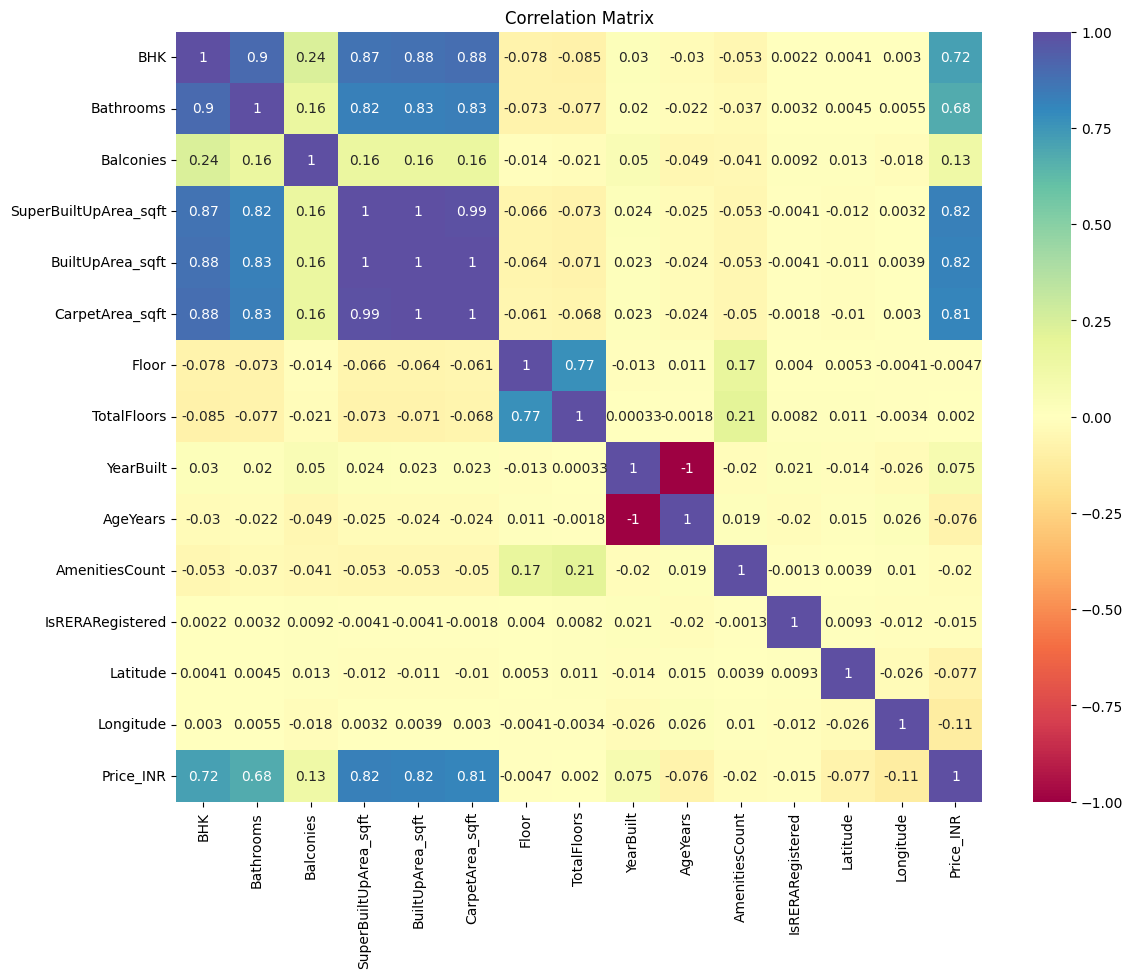

In [ ]:
plt.figure(figsize=(13, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap ='Spectral')
plt.title('Correlation Matrix')
plt.show()

In the correlation matrix we can see that:-
1) SuperBuiltUpArea, BuiltUpArea and CarpetArea are highly positively correlated => if one increases the othe other increases proportionally. They provide similar information (same correlation with target variable) so to avoid multicollinearity we can drop two variables.
2) AgeYears and YearBuilt are perfectly negavtively correlated so we can drop one
3) Target Variable(Price) is highly positively correlated with BHK, Bathrooms, Area per sqft

In [ ]:
df.groupby(['City','BuildingType']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,City,BuildingType,count
20,Delhi NCR,High Rise,211
14,Chennai,High Rise,199
44,Pune,High Rise,198
8,Bengaluru,High Rise,192
2,Ahmedabad,High Rise,191
38,MMR,High Rise,179
26,Hyderabad,High Rise,179
32,Kolkata,High Rise,175
13,Chennai,Gated Community,118
22,Delhi NCR,Mid Rise,110


In a city the highest number of a particular building type

In [ ]:
# We understand the data and relationships between variables, we now move to cleaning the data.

## DATA CLEANING

`Droping Irrelevant columns using domain knowledge and insights from heatmap`

Irrelevant features = ListingID

Redundant features:-  
    - Locality  (City is enough for the analysis)  
    - YearBuilt (AgeYears tells the same information)  
    - SuperBuiltUpArea & CarpetArea & BuiltUpArea are similarly correlated, so BuiltUpArea is taken while others are dropped because of correlation value greater than CarpetArea and same as SuperBuiltUpArea  
    - Latitude and Longitude (does not give us any information that impacts our model)  

Features with many missing values - RERAID  



In [ ]:
# Another dataframe df_temp created where the tuples and attributes are dropped, data is cleaned.
df_temp = df.drop(columns=['ListingID','Locality','YearBuilt','SuperBuiltUpArea_sqft','CarpetArea_sqft','RERAID','Latitude','Longitude'])

Dropping Tuples

In [ ]:
# the records where City values were missing were dropped to prevent distortion
null_records_city = df_temp[df_temp['City'].isnull()]
df_temp.drop(null_records_city.index, inplace=True)

In [ ]:
print(df.shape)
print(df_temp.shape)

(4728, 24)
(4678, 16)


 Filling the Missing Values

In [ ]:
# Identify numeric and categorical
categorical_cols = df_temp.select_dtypes(include=['object', 'bool']).columns
numeric_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values
for col in numeric_cols:
    df_temp[col].fillna(df_temp[col].median(), inplace=True)
for col in categorical_cols:
    df_temp[col].fillna(df_temp[col].mode()[0], inplace=True)

Changing Data Type

In [ ]:
#since the values are float data type, we can round of to make the change to data type int faster
df_temp['Balconies'] = df_temp['Balconies'].round(1)
df_temp['Bathrooms'] = df_temp['Bathrooms'].round(1)

In [ ]:
# Changing data types
df_temp[['Bathrooms', 'Balconies']] = df_temp[['Bathrooms', 'Balconies']].astype('int64')

Outlier handling

In [ ]:
# Find outlier counts in each column
outlier_counts = {}

for col in df_temp.select_dtypes(include='number').columns:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    outliers = (df_temp[col] < lower_bound) | (df_temp[col] > upper_bound)

    # Count proportion of outliers
    outlier_counts[col] = outliers.sum() / df_temp.shape[0]

# create DataFrame
df_outliers = df_temp[outliers]

df_outlier_proportion = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count%'])
df_outlier_proportion

,Column,Outlier_Count%
0,BHK,0.135528
1,Bathrooms,0.000000
2,Balconies,0.000000
3,BuiltUpArea_sqft,0.028645
4,Floor,0.064771
5,TotalFloors,0.041898
6,AgeYears,0.004489
7,AmenitiesCount,0.000214
8,Price_INR,0.048739


In [ ]:
# Dropping rows with outliers
df_cleaned = df_temp[~outliers]
df_temp = df_cleaned

In [ ]:
# The data is now clean and now we move to the next step

# Feature Transformation


In [ ]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Encoding categorical variables

In [ ]:
categorical_cols = df_temp.select_dtypes(include=['object', 'bool']).columns

# one-hot encode
df_temp = pd.get_dummies(df_temp, columns=categorical_cols, drop_first=True)

# Convert booleans to integers
bool_cols = df_temp.select_dtypes(include='bool').columns
df_temp[bool_cols] = df_temp[bool_cols].astype(int)

creating categorical variable dummies though increases the number of attributes but help include and simplify the analysis of categorical variables, pin-points the exact category that is influencing the data's target variable.

### Transforming attributes
Tranform following columns to deal with outliers and skewness
 - Price_INR  
 - BuiltUpArea_sqft  
 - Floor
   
<br>

- **Skewness value Interpretation**
  - 0	-> symmetric
  - greater than 1  ->  Highly right-skewed -> Usually apply log transform
  - < -1	Highly left-skewed	 log transform

**Log Transformation**

In [ ]:
# Tranform target variable to deal with outliers and skewness

print(df_temp['Price_INR'].skew())

df_temp['Price_INR'] = np.log1p(df_temp['Price_INR'])

print(df_temp['Price_INR'].skew())

0.7458004282359989
-0.47989057106845934


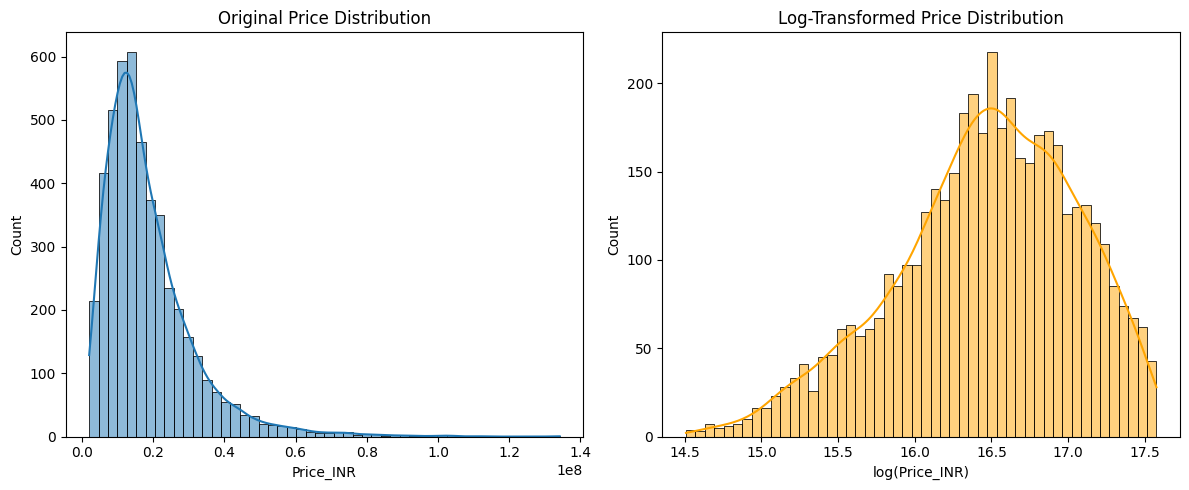

In [ ]:
plt.figure(figsize=(12, 5))

# Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Price_INR'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price_INR')

# Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_temp['Price_INR'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('log(Price_INR)')

plt.tight_layout()
plt.show()

**Standard Scaling**

In [ ]:
scaler = StandardScaler()

df_temp['BuiltUpArea_sqft'] = scaler.fit_transform(df_temp[['BuiltUpArea_sqft']])
df_temp['Floor'] = scaler.fit_transform(df_temp[['Floor']])

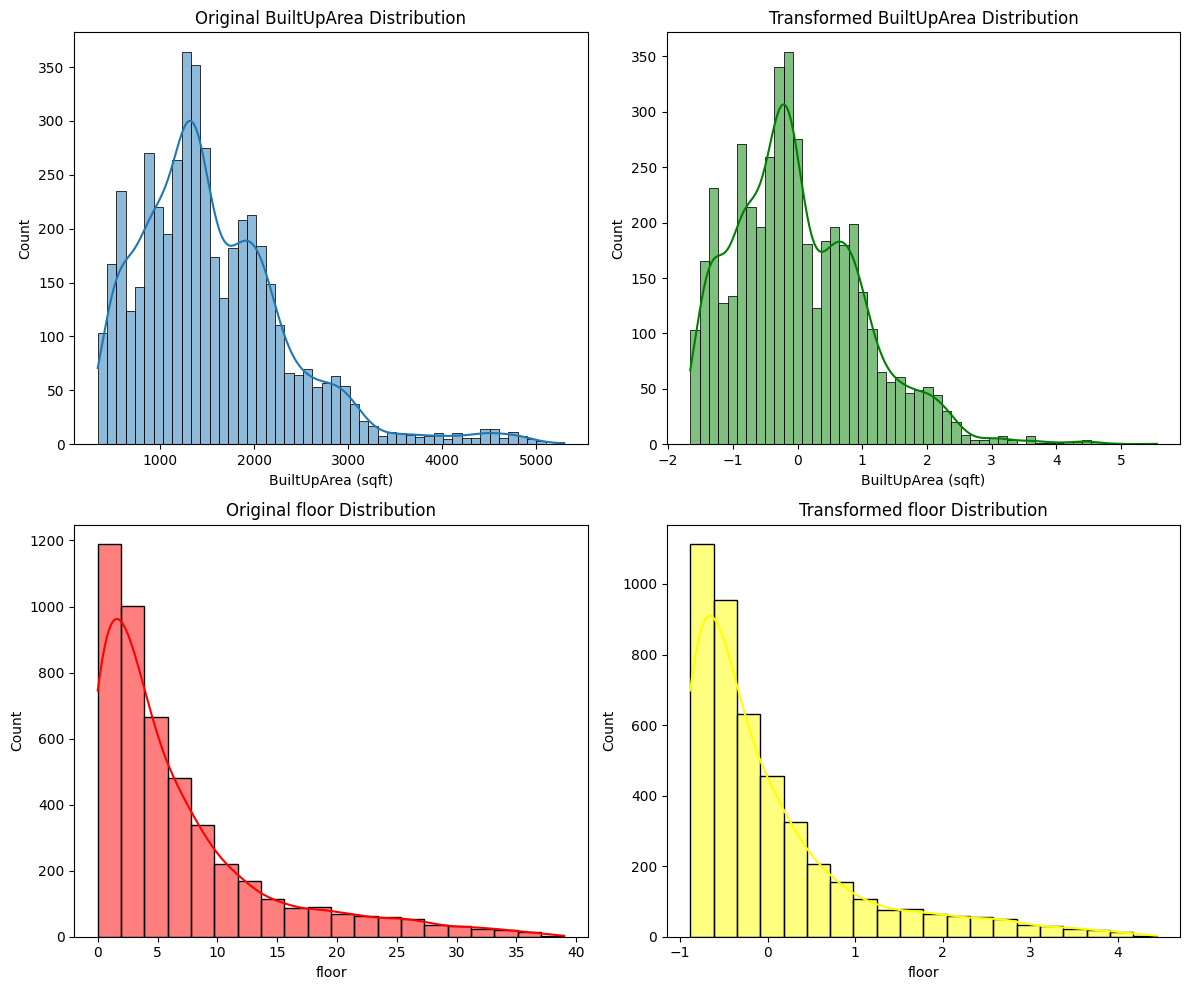

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['BuiltUpArea_sqft'], bins=50, kde=True)
plt.title('Original BuiltUpArea Distribution')
plt.xlabel('BuiltUpArea (sqft)')

plt.subplot(2, 2, 2)
sns.histplot(df_temp['BuiltUpArea_sqft'], bins=50, kde=True, color='green')
plt.title('Transformed BuiltUpArea Distribution')
plt.xlabel('BuiltUpArea (sqft)')

plt.subplot(2, 2, 3)
sns.histplot(df['Floor'], bins=20, kde=True, color='red')
plt.title('Original floor Distribution')
plt.xlabel('floor')

plt.subplot(2, 2, 4)
sns.histplot(df_temp['Floor'], bins=20, kde=True, color='yellow')
plt.title('Transformed floor Distribution')
plt.xlabel('floor')

plt.tight_layout()
plt.show()

The values of variables BuiltUpArea and Floor have been scaled.

# Feature Selection
### Recursive Feature Elimination

"The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached." -from scikit-learn.org

In [ ]:
#importing the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RFE works by iteratively training a linear model on all features, evaluating its importance based on model performance and then based on the score, it eliminates the non-important features.

In [ ]:
# defining X and y variables were X consists of all columns but target, while y is target variable
data = df_temp
X = data.drop('Price_INR', axis=1)
y = data['Price_INR']
feature_names = X.columns

# using Linear Regression model
estimator = LinearRegression()

# the iteration once 10 features will be selected will stop
rfe = RFE(estimator, n_features_to_select=10, step=1)

# Fitting RFE to the data
rfe.fit(X, y)

# the selected feature indices and names
selected_indices_rfe = np.where(rfe.support_)[0]
selected_features_rfe = feature_names[selected_indices_rfe]

print(f"RFE selected features: {selected_features_rfe}")

# Applying the selection to rfe
X_rfe = X.iloc[:, selected_indices_rfe]

RFE selected features: Index(['BuiltUpArea_sqft', 'City_Bengaluru', 'City_Chennai', 'City_Delhi NCR',
       'City_Hyderabad', 'City_Kolkata', 'City_MMR', 'City_Pune',
       'PropertyType_Penthouse', 'PropertyType_Studio'],
      dtype='object')


The RFE identified 10 key variables affecting house prices, primarily related to property size, location, and type. This suggests that these factors drive the majority of price variation across the dataset.

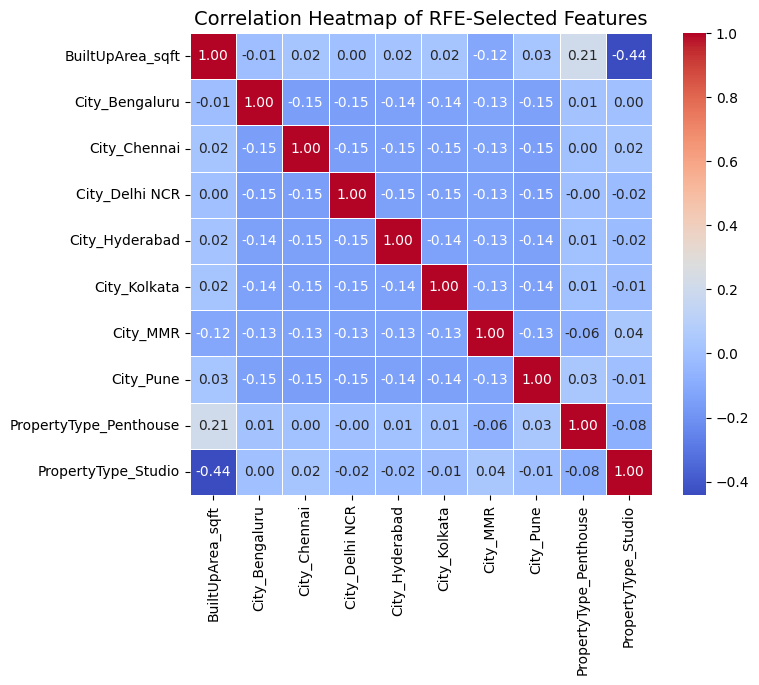

In [ ]:
df_selected = df_temp[selected_features_rfe]   # subset with only RFE-selected features

# --- Compute correlation matrix ---
corr_matrix = df_selected.corr()

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of RFE-Selected Features", fontsize=14)
plt.show()

# Feature Evaluation

In [ ]:
# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rfe, y, test_size=0.2, random_state=38)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

To find out the feature importance, its essential to train the model in order to find out the coeffecients of the variables that is then configured to find out feature importance.

Finding out the feature importance

In [ ]:
importance = abs(model.coef_)
feature_importance = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': importance
}).sort_values('Importance', ascending=False)
print(feature_importance)

                  Feature  Importance
6                City_MMR    1.141728
3          City_Delhi NCR    0.586351
1          City_Bengaluru    0.585013
2            City_Chennai    0.556081
7               City_Pune    0.540884
9     PropertyType_Studio    0.539068
4          City_Hyderabad    0.446673
0        BuiltUpArea_sqft    0.425602
5            City_Kolkata    0.394715
8  PropertyType_Penthouse    0.247645


- According to feature importance values of selected features, we find that in the dataset the **location of a house is a strong predictor of its price**, if the location is Mumbai(MMR) it significantly raises the price; similarly with Bengaluru, Delhi, Chennai, Pune and Kolkata: these cities are metropolitan hubs and the price of houses will increase if you buy in these locations.  
- Then we have **built-up-area** influencing the house prices more than BHK means that with more area prices will increase. In real estate markets, two houses with the same BHK can differ vastly in price if one has a larger built-up area or is in a premium location.  
- **PropertyType** capture price variations associated with different property categories — studios representing the lower end of the market and explains the dip in prices while penthouses the middle to higher salaried segments explain the rise in prices of house.   

These selected features provide a balanced representation of spatial, structural, and categorical factors, resulting in a model that is both interpretable and predictive.

## Model Construction

- Simple Linear Regression model
- Multiple Linear Regression model

In [ ]:
X_simple = df_temp[['BuiltUpArea_sqft']]
y_simple = df_temp['Price_INR']

# Split data (optional, but good practice)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and train the model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Make predictions
y_pred_s = model_simple.predict(X_test_s)

In [ ]:
mse = mean_squared_error(y_test_s, y_pred_s)
rmse = np.sqrt(mse) # RMSE is the square root of MSE
r2 = r2_score(y_test_s, y_pred_s)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.1123
Root Mean Squared Error (RMSE): 0.3352
R-squared (R2) Score: 0.6561


In [ ]:
X_simple1 = df_temp[['PropertyType_Studio']]
y_simple = df_temp['Price_INR']

# Split data (optional, but good practice)
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(X_simple1, y_simple, test_size=0.2, random_state=42)

# Create and train the model
model_simple = LinearRegression()
model_simple.fit(X_train_s1, y_train_s1)

# Make predictions
y_pred_s1 = model_simple.predict(X_test_s1)

mse = mean_squared_error(y_test_s1, y_pred_s1)
rmse = np.sqrt(mse) # RMSE is the square root of MSE
r2 = r2_score(y_test_s1, y_pred_s1)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.2264
Root Mean Squared Error (RMSE): 0.4758
R-squared (R2) Score: 0.3069


Multiple Linear Regression

In [ ]:
# Predict on test data
y_pred = model.predict(X_test1)

# Evaluate
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.03
R² Score: 0.917


In [ ]:
y_train_pred = model.predict(X_train1)
y_test_pred = model.predict(X_test1)

# --- Training performance ---
r2_train = r2_score(y_train1, y_train_pred)
mae_train = mean_absolute_error(y_train1, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_pred))

# --- Testing performance ---
r2_test = r2_score(y_test1, y_test_pred)
mae_test = mean_absolute_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test1, y_test_pred))

# --- Print results ---
print("Training Performance:")
print(f"  R² Score: {r2_train:.3f}")
print(f"  MAE: {mae_train:.3f}")
print(f"  RMSE: {rmse_train:.3f}")
print("\nTesting Performance:")
print(f"  R² Score: {r2_test:.3f}")
print(f"  MAE: {mae_test:.3f}")
print(f"  RMSE: {rmse_test:.3f}")

# --- Optional: quick comparison ---
print("\nDifference in R² (Train - Test):", round(r2_train - r2_test, 3))

Training Performance:
  R² Score: 0.934
  MAE: 0.118
  RMSE: 0.154

Testing Performance:
  R² Score: 0.917
  MAE: 0.125
  RMSE: 0.165

Difference in R² (Train - Test): 0.017


70-30 split

In [ ]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test2)

# Evaluate
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.02
Mean Absolute Error: 0.12
R² Score: 0.931


In [ ]:
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

# --- Training performance ---
r2_train = r2_score(y_train2, y_train_pred)
mae_train = mean_absolute_error(y_train2, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train2, y_train_pred))

# --- Testing performance ---
r2_test = r2_score(y_test2, y_test_pred)
mae_test = mean_absolute_error(y_test2, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test2, y_test_pred))

# --- Print results ---
print("Training Performance:")
print(f"  R² Score: {r2_train:.3f}")
print(f"  MAE: {mae_train:.3f}")
print(f"  RMSE: {rmse_train:.3f}")
print("\nTesting Performance:")
print(f"  R² Score: {r2_test:.3f}")
print(f"  MAE: {mae_test:.3f}")
print(f"  RMSE: {rmse_test:.3f}")

# --- Optional: quick comparison ---
print("\nDifference in R² (Train - Test):", round(r2_train - r2_test, 3))

Training Performance:
  R² Score: 0.931
  MAE: 0.121
  RMSE: 0.158

Testing Performance:
  R² Score: 0.931
  MAE: 0.116
  RMSE: 0.152

Difference in R² (Train - Test): 0.0


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# --- Define cross-validation setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Custom scoring functions ---
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# --- Cross-validation scores ---
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
mae_scores = cross_val_score(model, X, y, cv=cv, scoring=mae_scorer)
rmse_scores = cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)

# --- Display results ---
print("Cross-Validation Results (5-Fold):")
print(f"R² Scores:  {r2_scores}")
print(f"Mean R²:    {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")

print(f"\nMAE Scores: {np.abs(mae_scores)}")
print(f"Mean MAE:   {np.abs(mae_scores).mean():.3f} ± {np.abs(mae_scores).std():.3f}")

print(f"\nRMSE Scores:{np.abs(rmse_scores)}")
print(f"Mean RMSE:  {np.abs(rmse_scores).mean():.3f} ± {np.abs(rmse_scores).std():.3f}")


Cross-Validation Results (5-Fold):
R² Scores:  [0.9424211  0.94880371 0.94461293 0.94631817 0.94962796]
Mean R²:    0.946 ± 0.003

MAE Scores: [0.10637538 0.10018686 0.10912416 0.10898448 0.10319262]
Mean MAE:   0.106 ± 0.003

RMSE Scores:[0.13713759 0.13449653 0.1433424  0.13801295 0.13375747]
Mean RMSE:  0.137 ± 0.003


# Summary

1) Data Extraction -  
  > - We extracted the data directly from kaggle using kagglehub. It is reproducible because it automatically fetches the exact version of the dataset from Kaggle, without you manually handling authentication or file paths.   
  > - Since the data contains many files, the ones relevant to our project are extracted to panda dataframes and then merged for further analysis.

2) Data Audit & Availability Check -

> - We checked the dataset's:   
>> - shape,   
>> - information of columns, data types, storage memory,    
>> - missing values, missing values percent,   
>> - duplicate values and   
>> - unique counts in each attribute.  
>> This allowed us to check dataset's structure, data integrity and quality.
> - We believe that dataset contains sufficient variables for predicting house prices  

3) Exploratory Data Analysis -  
We observed the
> - Dataset's summary statistics and   
> - Variate analaysis using visualizations
>> We have used seaborn and matplot libraries for visualizing countplots, KDE plots, box plots, scatter plots, barplots and correation heatmap for variables and understanding the relationships, find out potential anomalies, observe the distribution patterns as well as any other information we can conclude from the visuals.  

4) Data Cleaning -   
> - From the steps done before  and information we got in data auditing and EDA we first reduced the data by dropping columns and rows.   
> - We then imputed the missing values in numeric variables using median and categorical variables using mode.  
> - Then outliers were found out and rows with outliers were removed.  
Data cleaning made the dataset more robust with better quality.  

5) Feature Transformation -   
> - We first did  - Encoding of categorical variables, by creating dummy variables   
> - next we transformed - Log Transformation of Price_INR variable to reduce skewness and stabilize variance      
> - and then scaled - BuiltUpArea and Floor variables

6) Feature Selection -
> Using Recursive Feaure Elimination (wrapper method) a feature selection method - a subset of 10 features are selected, and less significant features were removed.  

7) Feature Evaluation -   
- We checked the selected features by their Feature importance, result was that the feature subset captured the most influential predictors of house price.    
    
8) Model Construction
- We are going to build
> Simple Linear Regression model
>> a single feature is not able to completely explain the change in Price_INR of houses
> Multiple Linear Regression model
>> the features interact with each other and together are able to explain the changes in price of houses. So Multiple Linear Regression model is more robust in predicting house prices.

